# Решение жесткой системы методом Рунге-Кутты 4-го порядка

Решим систему:

$$dy_1/dt = -1.71 * y_1 + 0.43 * y_2 + 8.23 * y_3 + 0.0007$$
$$dy_2/dt = 1.71 * y_1 - 8.75 * y_2$$
$$dy_3/dt = -10.03 * y_3 + 0.43 * y_4 + 0.035 * y_5$$
$$dy_4/dt = 8.32 * y_2 + 1.71 * y_3 - 1.12 * y_4$$
$$dy_5/dt = -1.745 * y_5 + 0.43 * y_6 + 0.43 * y_7$$
$$dy_6/dt = -280 * y_6 * y_8 + 0.69 * y_4 + 1.71 * y_5 - 0.43 * y_6 + 0.69 * y_7$$
$$dy_7/dt = 280 * y_6 * y_8 - 1.87 * y_7$$
$$dy_8/dt = -dy_7/dt$$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def differentiation_model(t, y):
    y_der = np.zeros(8)
    y_der[0] = -1.71 * y[0] + 0.43 * y[1] + 8.23 * y[2] + 0.0007
    y_der[1] = 1.71 * y[0] - 8.75 * y[1]
    y_der[2] = -10.03 * y[2] + 0.43 * y[3] + 0.035 * y[4]
    y_der[3] = 8.32 * y[1] + 1.71 * y[2] - 1.12 * y[3]
    y_der[4] = -1.745 * y[4] + 0.43 * y[5] + 0.43 * y[6]
    y_der[5] = -280 * y[5] * y[7] + 0.69 * y[3] + 1.71 * y[4] - 0.43 * y[5] + 0.69 * y[6]
    y_der[6] = 280 * y[5] * y[7] - 1.87 * y[6]
    y_der[7] = -y_der[6]
    return y_der

Используем метод Рунге-Кутты 4 порядка:

In [2]:
def runge_kutta_4(y, t, h, func):
    k1 = h * func(t, y)
    k2 = h * func(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * func(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * func(t + h, y + k3)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6.

Выбор номера y, которая будет выведена на графике осуществим здесь:

In [3]:
y_chs = 1

Зададим начальные значения y и длину отрезка интегрирования:

In [4]:
y = [1, 0, 0, 0, 0, 0, 0, 0.0057]
t = 0.
t_max = 421.8122
t_span = [t, t_max]

Для начала решим систему методом Рунге-Кутты 4-го порядка из библиотеки scipy:

In [5]:
res = solve_ivp(differentiation_model, t_span, y, method='RK45')

Теперь решим при помощи нашей функции:

In [6]:

y_data, t_data = [], []

y_data.append(y[y_chs])
t_data.append(t)
dt = 0.01
while t <= t_max:
    t += dt
    y = runge_kutta_4(y, t, dt, differentiation_model)
    y_data.append(y[y_chs])
    t_data.append(t)

Теперь выведем данные на графике:

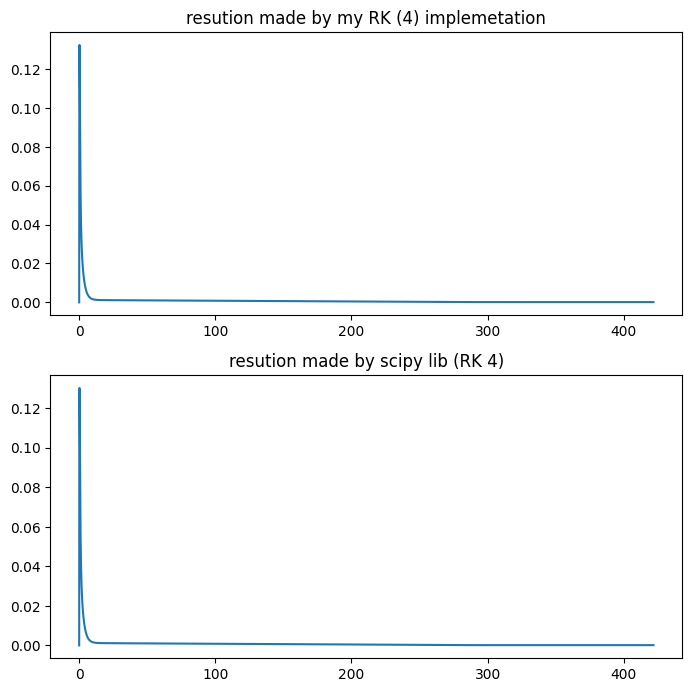

In [9]:
figure, axis = plt.subplots(2, 1, figsize=(7, 7))

axis[0].plot(t_data, y_data)
axis[0].set_title("resution made by my RK (4) implemetation")
axis[1].plot(res.t, res.y[y_chs])
axis[1].set_title("resution made by scipy lib (RK 4)")
figure.tight_layout(pad=1.0)
plt.show()